In [1]:
# !pip install snowflake-connector-python


In [203]:
import numpy as np
import math
import pandas as pd
import re
from datetime import date, datetime
import json
from abc import ABCMeta, abstractmethod
import boto3

In [204]:
import snowflake.connector
import os
import sys

In [205]:
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt

In [206]:
class Credentials(metaclass=ABCMeta):
    pass
    
    
class SSMPSCredentials(Credentials):
    def __init__(self, secretid: str):
        self._secretid = secretid
        self._secrets = {}
        
    def get_keys(self):
        """
        credential fetching 
        """
        _aws_sm_args = {'service_name': 'secretsmanager', 'region_name': 'us-east-1'}
        secrets_client = boto3.client(**_aws_sm_args)
        get_secret_value_response = secrets_client.get_secret_value(SecretId=self._secretid)
        return get_secret_value_response
    
    
class BaseConnector(metaclass=ABCMeta):
    @abstractmethod
    def connect(self):
        raise NotImplementedError
    

In [207]:
class SnowflakeConnector(BaseConnector):
    def __init__(self, credentials: Credentials):
        keys = credentials.get_keys()
        self._secrets = json.loads(keys.get('SecretString', "{}"))

    def connect(self, dbname: str, schema: str = 'DEFAULT'):
        ctx = snowflake.connector.connect(
            user=self._secrets['login_name'],
            password=self._secrets['login_password'],
            account=self._secrets['account'],
            warehouse=self._secrets['warehouse'],
            database=dbname,
            schema=schema
        )

        return ctx
    
## Credentials
SF_CREDS = 'datascience-max-dev-sagemaker-notebooks'

## Snowflake connection 
conn=SnowflakeConnector(SSMPSCredentials(SF_CREDS))
ctx=conn.connect("MAX_PROD","WORKPLACE")

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/boto3/compat.py:88: PythonDeprecationWarning: Boto3 will no longer support Python 3.6 starting May 30, 2022. To continue receiving service updates, bug fixes, and security updates please upgrade to Python 3.7 or later. More information can be found here: https://aws.amazon.com/blogs/developer/python-support-policy-updates-for-aws-sdks-and-tools/
  warnings.warn(warning, PythonDeprecationWarning)


In [208]:
def run_query(query):
    cursor = ctx.cursor()
    cursor.execute(query)
    df = pd.DataFrame(cursor.fetchall(), columns = [desc[0] for desc in cursor.description])
    df.columns= df.columns.str.lower()
    return df

In [114]:
fast_titles = pd.read_csv('FAST title analysis Updated.csv')

In [10]:
wiki = run_query('''SELECT * FROM max_prod.workspace.cds_competitor_insight_fast_analysis_wiki''')

In [48]:
mpm_imdb_mapping = pd.read_csv('movie mpm to imdb mapping_cds_update.csv')

In [50]:
mpm_imdb_mapping=mpm_imdb_mapping[['PRODUCT ID', 'imdb_id']]

In [68]:
mpm_imdb_mapping = mpm_imdb_mapping[mpm_imdb_mapping['imdb_id'].notnull()]

In [54]:
mpm_imdb_mapping['imdb_id'] = mpm_imdb_mapping['imdb_id'].str.strip(' ')

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


## Movie

## Wikipedia Trend Lines

In [56]:
fast_movies = fast_titles[fast_titles['Type'] == 'Movie']

In [13]:
fast_movies[fast_movies['UPDATED PRODUCT ID'].isnull()] # 103 titles that do not have product id

,Type,Channel,Title,Year,Genre,Runtime,Bucket,MPM from Prior List,Tentpole,Additional Titles to Pull,PRODUCT ID,Product ID,Co-Fi?,Unnamed: 13,UPDATED PRODUCT ID,Different than Original?
26,Movie,Action,Jackie Chan's First Strike,1997.0,ACTION,1.46,C,not in prior list,No,NaN,2017077.0,1013386.0,No,NaN,NaN,NaN
30,Movie,Action,"Hitman, The",1992.0,ACTION,1.60,C,not in prior list,No,NaN,2002630.0,1001968.0,No,NaN,NaN,NaN
33,Movie,Action,Born to Ride,1991.0,ACTION,1.50,C,not in prior list,No,NaN,2002531.0,1001869.0,Yes,NaN,NaN,NaN
39,Movie,Action,Cobra,1986.0,ACTION,1.46,C,not in prior list,No,NaN,2005034.0,1003981.0,No,NaN,NaN,NaN
61,Movie,Action,Logan's Run,1976.0,ACTION,2.00,CLASSIC,2011101,No,NaN,2031036.0,1023507.0,No,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777,Movie,War,Above and Beyond,1953.0,DRAMA,2.03,CLASSIC,not in prior list,No,NaN,2008382.0,1006362.0,No,NaN,NaN,NaN
779,Movie,War,Springfield Rifle,1953.0,WESTERN,1.55,CLASSIC,not in prior list,No,NaN,2000402.0,1000384.0,No,NaN,NaN,NaN
783,Movie,War,Rocky Mountain,1951.0,WESTERN,1.38,CLASSIC,not in prior list,No,NaN,2000352.0,1000334.0,No,NaN,NaN,NaN
798,Movie,War,To Have and Have Not,1944.0,ADVENTURE,1.66,CLASSIC,not in prior list,No,NaN,2013565.0,1010953.0,No,NaN,NaN,NaN


In [62]:
fast_movies.head()

,Type,Channel,Title,Year,Genre,Runtime,Bucket,Tentpole,Co-Fi?,PRODUCT ID
0,Movie,Action,"Matrix, The",1999.0,ACTION,2.25,A,Yes,Yes,2003656.0
1,Movie,Action,Terminator 4: Salvation,2009.0,ACTION,1.92,A,Yes,No,2047893.0
2,Movie,Action,Rush Hour,1998.0,ACTION,1.62,A,Yes,No,2017113.0
3,Movie,Action,Clash Of The Titans (2010),2010.0,ACTION,1.77,A,Yes,No,2043312.0
4,Movie,Action,"Fugitive, The",1993.0,ACTION,2.13,A,Yes,No,2003257.0


In [61]:
fast_movies = fast_movies.drop(['MPM from Prior List', 'Additional Titles to Pull', 'PRODUCT ID', 'Product ID', 'Unnamed: 13', 'Different than Original?'], axis = 1)\
                         .rename(columns = {'UPDATED PRODUCT ID': 'PRODUCT ID'})

In [69]:
fast_movie_wiki = pd.merge(fast_movies, mpm_imdb_mapping[['imdb_id', 'PRODUCT ID']], 
                           on = ['PRODUCT ID'], how = 'left')

In [64]:
fast_movie_wiki.head()

,Type,Channel,Title,Year,Genre,Runtime,Bucket,Tentpole,Co-Fi?,PRODUCT ID,imdb_id
0,Movie,Action,"Matrix, The",1999.0,ACTION,2.25,A,Yes,Yes,2003656.0,tt0133093
1,Movie,Action,Terminator 4: Salvation,2009.0,ACTION,1.92,A,Yes,No,2047893.0,tt0438488
2,Movie,Action,Rush Hour,1998.0,ACTION,1.62,A,Yes,No,2017113.0,tt0120812
3,Movie,Action,Clash Of The Titans (2010),2010.0,ACTION,1.77,A,Yes,No,2043312.0,tt0800320
4,Movie,Action,"Fugitive, The",1993.0,ACTION,2.13,A,Yes,No,2003257.0,tt0106977


In [70]:
fast_movie_wiki[fast_movie_wiki['imdb_id'].isnull()]

,Type,Channel,Title,Year,Genre,Runtime,Bucket,Tentpole,Co-Fi?,PRODUCT ID,imdb_id
26,Movie,Action,Jackie Chan's First Strike,1997.0,ACTION,1.46,C,No,No,NaN,NaN
30,Movie,Action,"Hitman, The",1992.0,ACTION,1.60,C,No,No,NaN,NaN
33,Movie,Action,Born to Ride,1991.0,ACTION,1.50,C,No,Yes,NaN,NaN
39,Movie,Action,Cobra,1986.0,ACTION,1.46,C,No,No,NaN,NaN
61,Movie,Action,Logan's Run,1976.0,ACTION,2.00,CLASSIC,No,No,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
787,Movie,War,Above and Beyond,1953.0,DRAMA,2.03,CLASSIC,No,No,NaN,NaN
789,Movie,War,Springfield Rifle,1953.0,WESTERN,1.55,CLASSIC,No,No,NaN,NaN
793,Movie,War,Rocky Mountain,1951.0,WESTERN,1.38,CLASSIC,No,No,NaN,NaN
808,Movie,War,To Have and Have Not,1944.0,ADVENTURE,1.66,CLASSIC,No,No,NaN,NaN


In [39]:
fast_movie_wiki.to_csv('after_mapping_titles.csv')

In [71]:
wiki.head()

,real_date,real_date_month,title,platform,imdb_id,production_release_date,number_of_votes,imdb_rating,country,content_type,primary_genre,secondary_genre,in_house,scripted,is_original,primary_production_company,primary_production_parent_company,primary_production_country,production_company_countries,page_views
0,2023-01-06,2023-01-01,Bad Vegan and the Teleportation Machine,None,tt4205426,2016-02-02,32,6.7,United States,None,None,None,None,None,None,None,None,None,"[""US""]",3.973339
1,2023-01-01,2023-01-01,Ginger Snaps,Peacock,tt0210070,2000-08-01,48815,6.8,United States,Movie,Sci-Fi & Fantasy,Horror,Licensed,Scripted,Yes,Lions Gate Films,Lionsgate,Canada,"[""CA""]",259.591513
2,2023-01-02,2023-01-01,Pieta,Hulu,tt2299842,2012-09-04,15023,7.1,United States,Movie,Crime & Thriller,Drama,Licensed,Scripted,Yes,Good Film,Canal +,South Korea,"[""KR""]",98.009041
3,2023-01-07,2023-01-01,Am roten Kliff,None,tt1063591,None,0,None,United States,None,None,None,None,None,None,None,None,None,"[""DE""]",0.662223
4,2023-01-01,2023-01-01,"I, Jane Doe",None,tt0040463,1948-05-25,106,7.1,United States,None,None,None,None,None,None,None,None,None,"[""US""]",3.311116


In [72]:
wiki = wiki[['real_date', 'imdb_id', 'page_views']].drop_duplicates()

In [73]:
fast_movie_wiki = pd.merge(fast_movie_wiki[['Title', 'PRODUCT ID', 'imdb_id']], wiki,
                          on = ['imdb_id'], how = 'left')

In [74]:
fast_movie_wiki[fast_movie_wiki['real_date'].isnull()]

,Title,PRODUCT ID,imdb_id,real_date,page_views
1534,Jackie Chan's First Strike,NaN,NaN,NaN,NaN
1712,"Hitman, The",NaN,NaN,NaN,NaN
1831,Born to Ride,NaN,NaN,NaN,NaN
2127,Cobra,NaN,NaN,NaN,NaN
3308,Fighting Black Kings,2016929.0,tt0186105,NaN,NaN
...,...,...,...,...,...
39844,Above and Beyond,NaN,NaN,NaN,NaN
39903,Springfield Rifle,NaN,NaN,NaN,NaN
40081,Rocky Mountain,NaN,NaN,NaN,NaN
40902,To Have and Have Not,NaN,NaN,NaN,NaN


In [75]:
len(fast_movie_wiki.imdb_id.unique())

704

In [76]:
fast_movie_wiki.sort_values(by = ['Title', 'imdb_id', 'real_date'], inplace = True)

In [77]:
fast_movie_wiki['real_date'] = pd.to_datetime(fast_movie_wiki['real_date'])

In [78]:
fast_movie_wiki.reset_index(drop = True, inplace = True)

In [79]:
fast_movie_wiki.drop_duplicates(inplace = True)

In [82]:
temp_df=fast_movie_wiki.groupby(['Title', 'imdb_id',])['page_views'].rolling(7).mean().reset_index()

In [84]:
temp_df.head()

,Title,imdb_id,level_2,page_views
0,A Very Long Engagement,NaN,354,NaN
1,Above and Beyond,NaN,414,NaN
2,Addicted to Love,NaN,649,NaN
3,Airborne,NaN,827,NaN
4,Almost Heroes,NaN,1241,NaN


In [85]:
temp_df = temp_df[['level_2', 'page_views']].set_index('level_2')

In [86]:
fast_movie_wiki['page_view_7_avg'] = temp_df['page_views']

In [87]:
fast_movie_wiki_feb = fast_movie_wiki[['Title', 'imdb_id', 'PRODUCT ID', 'real_date', 'page_views']].drop_duplicates()
fast_movie_wiki_feb = fast_movie_wiki_feb[(fast_movie_wiki_feb['real_date'] >= '2023-02-01')
                                     &(fast_movie_wiki_feb['real_date'] <= '2023-02-28')
                                     ].groupby(['Title', 'imdb_id','PRODUCT ID']).sum().reset_index()

In [97]:
len(fast_movie_wiki_feb.imdb_id.unique())

698

In [88]:
fast_movie_wiki_feb.to_csv('fast_movie_wiki_feb.csv')

In [98]:
fast_movie_wiki_final_list = pd.merge(fast_titles, fast_movie_wiki_feb, 
                                      left_on = ['UPDATED PRODUCT ID'], right_on = ['PRODUCT ID'] , how = 'left')

In [99]:
fast_movie_wiki_final_list.drop_duplicates(inplace = True)

In [100]:
fast_movie_wiki_final_list.to_csv('fast_movie_wiki_final_list.csv')

In [92]:
pd.set_option('display.max_rows', None)

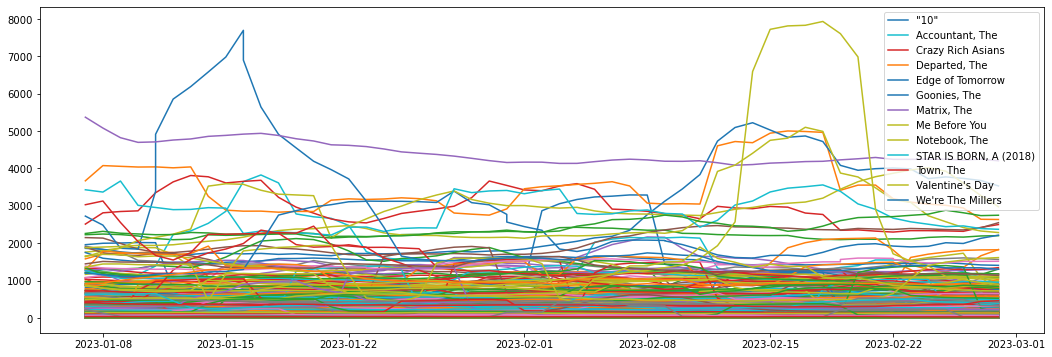

In [93]:
fig, ax = plt.subplots(figsize=(18,6))
for i in fast_movie_wiki.imdb_id.unique():
    plot_df = fast_movie_wiki[fast_movie_wiki['imdb_id'] == i]
    if plot_df.page_view_7_avg.max()> 3000:   
        ax.plot(plot_df['real_date'], plot_df['page_view_7_avg'], label =plot_df.Title.unique()[0])
    else:
        ax.plot(plot_df['real_date'], plot_df['page_view_7_avg'])
ax.legend()

In [102]:
feb_data = fast_movie_wiki[fast_movie_wiki['real_date'].isin(['2023-02-20', '2023-02-27'])]
feb_data = feb_data.pivot(index = ['Title', 'imdb_id'], columns = 'real_date', values = ['page_views']).reset_index()

In [103]:
fast_movie_wiki_feb.head()

,Title,imdb_id,PRODUCT ID,page_views
0,"""10""",tt0078721,2001931.0,48202.568024
1,15 Minutes,tt0179626,2017124.0,2464.132707
2,300 (2007),tt0416449,2035604.0,62243.025336
3,36 Hours,tt0057809,2009741.0,1558.873527
4,42 (2013),tt0453562,2062442.0,40585.013999


In [104]:
feb_data.columns = ['Title', 'imdb_id', '2023-02-20', '2023-02-27']

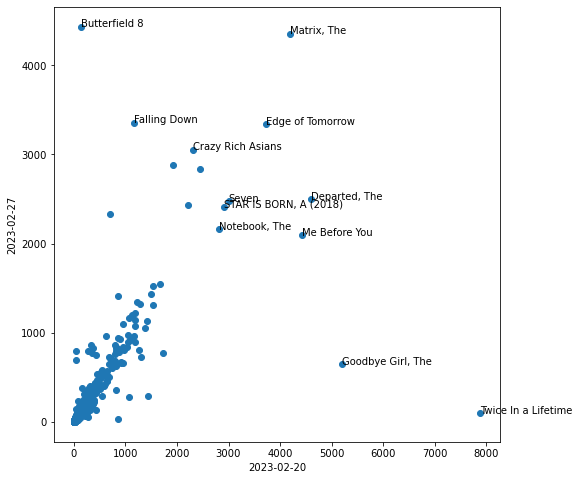

In [106]:
fig, ax = plt.subplots(figsize=(8,8))
ax.scatter(feb_data['2023-02-20'], feb_data['2023-02-27'])
ax.set_xlabel('2023-02-20')
ax.set_ylabel('2023-02-27')

for i in range(len(feb_data)):
    plot_df = feb_data.iloc[i]
    if plot_df['2023-02-20'] > 2500 or plot_df['2023-02-27'] > 3000:
        ax.annotate(plot_df.Title, (plot_df['2023-02-20'], plot_df['2023-02-27']))

# Analysis

In [132]:
fast_movie_wiki_final_list.head()

,Type,Channel,Title,Year,Genre,Runtime,Bucket,Tentpole,Product Id,imdb_id,page_views
0,Movie,Action,"Matrix, The",1999.0,ACTION,2.25,A,Yes,2003656.0,tt0133093,117986.991713
1,Movie,Action,Terminator 4: Salvation,2009.0,ACTION,1.92,A,Yes,2047893.0,tt0438488,32433.708035
2,Movie,Action,Rush Hour,1998.0,ACTION,1.62,A,Yes,2017113.0,tt0120812,28202.101478
3,Movie,Action,Clash Of The Titans (2010),2010.0,ACTION,1.77,A,Yes,2043312.0,tt0800320,25588.306316
4,Movie,Action,"Fugitive, The",1993.0,ACTION,2.13,A,Yes,2003257.0,tt0106977,33430.354023


In [131]:
fast_movie_wiki_final_list = fast_movie_wiki_final_list[['Type', 'Channel', 'Title_x', 'Year', 'Genre', 'Runtime', 'Bucket', 'Tentpole', 
                                                         'UPDATED PRODUCT ID', 'imdb_id', 'page_views']]\
                             .rename(columns = {'Title_x':'Title', 'UPDATED PRODUCT ID':'Product Id'})

In [135]:
fast_movie_wiki_final_list.Channel.unique()

array(['Action', 'Rom-Coms', 'Comedy', 'Family', 'Crime/Noir',
       'Romance (drama)', 'Westerns', 'Sports', 'War', 'CNN Films', nan],
      dtype=object)

In [134]:
data = {'group':['A', 'B', 'A', 'A', 'B', 'B', 'B', 'A', 'A'], 'obsval':[1, 3, 3, 5, 4, 6, 7, 7, 8]}
df = pd.DataFrame(data)
df_sum = df.groupby(['group'])['obsval'].agg([lambda x : np.quantile(x, q=0.85), "count"])
df_sum.columns = ['percentile', 'count']
print(df_sum)

       percentile  count
group                   
A            7.40      5
B            6.55      4


## Time Series Decomposition

In [143]:
from matplotlib import pyplot
from statsmodels.tsa.seasonal import seasonal_decompose

In [144]:
fast_movie_wiki[fast_movie_wiki['Title'] == 'Matrix, The'].imdb_id.unique()

array(['tt0133093'], dtype=object)

In [145]:
series = run_query('''
SELECT distinct title, imdb_id, real_date, page_views
FROM max_prod.workspace.cds_competitor_insight_sov_international
WHERE imdb_id = 'tt0078721'
and COUNTRY = 'United States'
ORDER BY title, imdb_id, real_date
''')

In [146]:
temp_df=series.groupby(['title', 'imdb_id',])['page_views'].rolling(7).mean().reset_index()

In [147]:
series.reset_index(drop = True, inplace = True)

In [148]:
series['page_view_7_avg'] = temp_df['page_views']

In [149]:
series = series[series['page_view_7_avg'].notnull()].page_view_7_avg.values

In [151]:
series

array([ 304.43874413,  307.98927404,  303.67400999,  303.33917749,
        298.6129112 ,  295.52517371,  325.70257172,  325.86420991,
        331.06927963,  337.92263324,  341.09814563,  348.262052  ,
        347.30933161,  317.95311998,  317.00866572,  313.2765483 ,
        316.06165785,  316.55449107,  318.74285277,  324.23273884,
        346.36116314,  355.30063361,  359.42033961,  356.63483091,
        356.18236334,  416.63924885,  512.24419978,  612.1302373 ,
        709.67548158,  795.17197699,  891.58805979,  971.59397026,
        986.01592015, 1078.53080273, 1098.62184082, 1076.0511994 ,
       1228.93616214, 1320.84671794, 1368.42141434, 1412.46009927,
       1328.14424097, 1312.23437973, 1343.61000019, 1206.98857768,
       1115.44514255, 1073.54033761, 1023.62178013, 1002.15430857,
        970.33048052,  932.21153612,  900.94313058,  887.29418215,
        872.94085794,  857.77399113,  833.09288365,  755.19478675,
        687.12436051,  620.90390451,  541.01284932,  470.67424

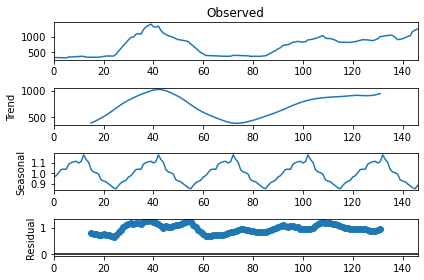

In [157]:
result = seasonal_decompose(series, model='multiplicative', period=30)
result.plot()
pyplot.title('')
pyplot.show()

# Viewership Prediction

In [115]:
imdb_title_mapping = run_query('''
            select               
                asset.viewable_id as title_id
                , imdb_title_id as imdb_id
                , min(asset_title_long) as title_name
            from max_prod.catalog.asset_dim as asset
            join enterprise_data.catalog.wm_catalog as c
                on asset.viewable_id = c.viewable_id
            where 1=1
                and asset.content_category in ('movies', 'special')
                and length(imdb_title_id) in (9,10)
            GROUP BY 1, 2
            
            union
            
            select                
                asset.series_id as title_id
                , imdb_series_id as imdb_id
                , min(SERIES_TITLE_LONG) as title_name
            from max_prod.catalog.asset_dim as asset
            join enterprise_data.catalog.wm_catalog as c
                on asset.viewable_id = c.viewable_id
            where 1=1
                and asset.content_category in ('series')
                and length(imdb_series_id) in (9,10)
            group by 1, 2
''')

In [158]:
imdb_title_mapping.head()

,title_id,imdb_id,title_name
0,GYyr69w3HgsLCwwEAAAF5,tt0093569,Moors and Christians
1,GY8IU1ANyJ5SgigEAAAtq,tt7144666,The Black Phone
2,GXmlRlgl7GJ4_wwEAAC8G,tt0263238,Crisis
3,GYF5UfQwKlpqSwwEAAAAf,tt8151874,Honey Boy
4,GYxYRqgBZX1iCmwEAAAqT,tt6383452,Wild


In [117]:
prediction = run_query('''
SELECT a.title, title_id, days_on_hbo_max,
a.first_release_date, a.cumulative_viewing_subs/b.viewing_subs as pct_actives
FROM max_prod.content_analytics.new_title_release_days_on_platform a
JOIN "MAX_PROD"."CONTENT_ANALYTICS"."CUMULATIVE_SUBS_DENOM" b
ON to_varchar(a.FIRST_RELEASE_DATE, 'yyyy-mm-dd') = b.start_date
and a.days_on_hbo_max = b.days_since_release+1
where 1=1
and days_on_hbo_max <= 28
and TITLE_LEVEL = 'Series and Movies'
''')

In [118]:
prediction.head()

,title,title_id,days_on_hbo_max,first_release_date,pct_actives
0,Craig of the Creek,GXbIIxQb4npGYoAEAAAch,7,2020-05-27 07:00:00,0.002230
1,Craig of the Creek,GXbIIxQb4npGYoAEAAAch,15,2020-05-27 07:00:00,0.002869
2,Craig of the Creek,GXbIIxQb4npGYoAEAAAch,2,2020-05-27 07:00:00,0.001449
3,Craig of the Creek,GXbIIxQb4npGYoAEAAAch,6,2020-05-27 07:00:00,0.002091
4,Craig of the Creek,GXbIIxQb4npGYoAEAAAch,11,2020-05-27 07:00:00,0.002598


In [119]:
prediction.count()

title                 192062
title_id              192482
days_on_hbo_max       192482
first_release_date    192482
pct_actives           192482
dtype: int64

In [121]:
mpm_imdb_mapping.head()

,PRODUCT ID,imdb_id
0,2010273.0,tt0022286
1,2012885.0,tt0034277
2,2010684.0,tt0038355
3,2007906.0,tt0038854
4,2000825.0,tt0039191


In [175]:
fast_title_viewership = pd.merge(fast_movies, mpm_imdb_mapping, 
                           on = ['PRODUCT ID'], how = 'left')

In [176]:
fast_title_viewership = pd.merge(fast_title_viewership, imdb_title_mapping[['imdb_id', 'title_id']],
                          on = ['imdb_id'], how = 'left')

In [177]:
# fast_title_viewership = pd.merge(fast_title_viewership, prediction[['title', 'title_id', 'days_on_hbo_max', 'pct_actives']],
#                           on = ['title_id'])

In [178]:
fast_title_viewership.head()

,Type,Channel,Title,Year,Genre,Runtime,Bucket,Tentpole,Co-Fi?,PRODUCT ID,imdb_id,title_id
0,Movie,Action,"Matrix, The",1999.0,ACTION,2.25,A,Yes,Yes,2003656.0,tt0133093,GXdu2VgPdq5uAuwEAADak
1,Movie,Action,Terminator 4: Salvation,2009.0,ACTION,1.92,A,Yes,No,2047893.0,tt0438488,GX3UnpgH94hmDbAEAAALV
2,Movie,Action,Terminator 4: Salvation,2009.0,ACTION,1.92,A,Yes,No,2047893.0,tt0438488,GWbgllwqf3sJ3wgEAAAFA
3,Movie,Action,Rush Hour,1998.0,ACTION,1.62,A,Yes,No,2017113.0,tt0120812,GYGQHkQKmf6UEpwEAAAAD
4,Movie,Action,Clash Of The Titans (2010),2010.0,ACTION,1.77,A,Yes,No,2043312.0,tt0800320,GXrH2TQB_D62brQEAAADU


In [202]:
len(fast_title_viewership[fast_title_viewership['Bucket'] == 'A'].imdb_id.unique())

60

In [180]:
fast_title_viewership.to_csv('bucket_a_movie_list.csv')

In [127]:
fast_title_viewership.sort_values(by = ['imdb_id', 'title_id', 'title', 'days_on_hbo_max'], inplace= True)

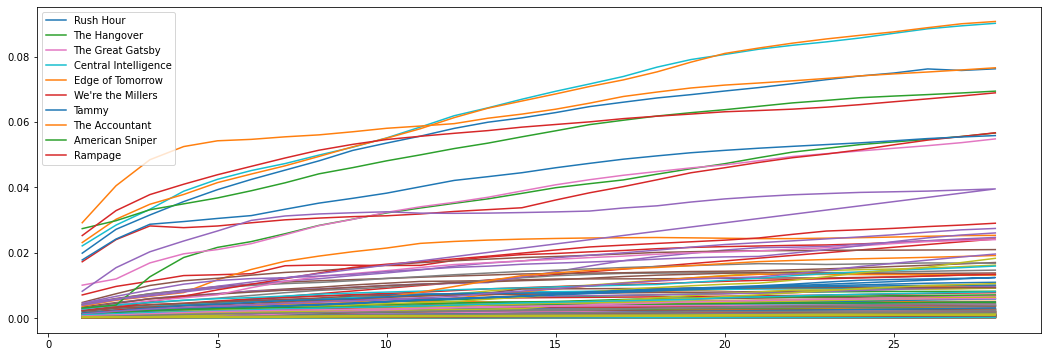

In [128]:
fig, ax = plt.subplots(figsize=(18,6))
for i in fast_title_viewership.imdb_id.unique():
    plot_df = fast_title_viewership[fast_title_viewership['imdb_id'] == i]
    if plot_df.pct_actives.max()> 0.05:   
        ax.plot(plot_df['days_on_hbo_max'], plot_df['pct_actives'], label =plot_df.title.unique()[0])
    else:
        ax.plot(plot_df['days_on_hbo_max'], plot_df['pct_actives'])
ax.legend()

In [191]:
on_chanel_viewers = run_query('''
SELECT
    daily_user_asset_summary_heartbeat.series_viewable_id  AS title_id,
    daily_user_asset_summary_heartbeat.asset_title AS asset_title,
    DATE_TRUNC('month', request_local_country_date)as date_month,
    COUNT(DISTINCT CASE WHEN daily_user_asset_summary_heartbeat.is_stream_longer_than_two_minutes THEN daily_user_asset_summary_heartbeat.hbo_uuid ELSE NULL END) AS monthly_total_viewers,
    COUNT(DISTINCT request_local_country_date) as num_of_days
FROM
    bi_analytics.daily_user_asset_summary AS daily_user_asset_summary_heartbeat
LEFT JOIN "CORE"."GEO_MAP"  AS geo_map ON (geo_map."COUNTRY_ISO_CODE") = daily_user_asset_summary_heartbeat.country_iso_code
WHERE 1=1
AND ((UPPER(( geo_map."REGION"  )) = UPPER('NORTH AMERICA')))
AND SERIES_VIEWABLE_ID IN ('GXdRsewUPO5uAuwEAABEI', 'GX5nwgQDNJZ6aoQEAAAHJ', 'GYGIiugVrw8MUuAEAAABi', 'GXd24ggvmxLPDfgEAAACM', 'GYXhKzAbBH7GzIwEAAAJG',
'GYS_I_wTdDa6NwwEAAAAC', 'GYS_EugxEAJOwcAEAAAAi', 'GYcy7egTKXZrCFgEAAAKc', 'GYS_bpQGz2MPDwgEAAAAN', 'GYXxsjQhvlsPDDgEAAAAC', 
'GYVeCIAJuVLfCIgEAAABV', 'GYVd_GgjcATStpwEAAAAe', 'GYVegjQFzllwDoAEAAAC3', 'GYJLPwAnMvbSdwwEAAAD8', 'GYGhpSwCFYsISvQEAAAAH', 
'GXmleewjcUCLCHAEAACBs', 'GX_yGHgt75MLDQQEAAAAC',
'GXdu2VgPdq5uAuwEAADak',
'GX3UnpgH94hmDbAEAAALV',
'GWbgllwqf3sJ3wgEAAAFA',
'GYGQHkQKmf6UEpwEAAAAD',
'GXrH2TQB_D62brQEAAADU',
'GXdu2SQFMAaXCPQEAADek',
'GXjtSkAWvKo7CZgEAABCk',
'GYJBUvAuwi4zDTQEAAAAC',
'GXwO3BQSdHsPDwgEAAAPQ',
'GYJWdJAUshsPCwgEAAABc',
'GXt_r5AwEa8PCwgEAAAsi',
'GXerChATBsUytlAEAAAje',
'GX9q5dgUGL8ILwgEAAAFw',
'GW88tsQhaPLqukAEAAAJQ',
'GWPUlwg8AP5hdqgEAAAA9',
'GYQk6nQkFS8NsmgEAAAHA',
'GYKa1nQNJaLHDwwEAAACY',
'GX6QtHQxBD5nCwwEAAAHM',
'GXGchGwJlJoGmwwEAAACR',
'GVU3XrwAJu1FvjSoJAYCp',
'GXwO8LwQUJbnDHQEAAARh',
'GYCF3-AxmF7-0pAEAAAAR',
'GXBkP_QGwkYa1vAEAAANh',
'GXyINwwb5IMJ6pQEAAAAU',
'GXnJJdwvyup4_wwEAAEzA',
'GXjtShgoHJ8PDwwEAAAhe',
'GXsUzqAHp-UCxkQEAAAAa',
'GYfmB_QZIFrusCAEAAAAY',
'GVU2hNgfF31FvjSoJAUMG',
'GV-BPaQSKT8JMwwEAAACP',
'GYKRGhgB8yXnDYgEAAADZ',
'GY31XlgfcNaaHgQEAAAHG',
'GW88sqQNhsrqukAEAAAI0',
'GYL_Z7AW4ppXCCQEAAADa',
'GYR1YhQ7-C7iVuQEAAAj-',
'GX07YPQvW3nOVpQEAAAEs',
'GXyINuQrm9o6vcwEAAAFE',
'GYMM_bgifpcLCYgEAAAAD',
'GW6PCdgYI0RjDwgEAAAFa',
'GXdu2ZAigOMPCwwEAADXI',
'GWGwmGAoKaKmywwEAAAB1',
'GY6PrmQBKQwnCZwEAAAjb',
'GXmf4DA8Y5iLCHAEAABwK',
'GYJ5XTwMdtZ6uswEAAAJz',
'GXx911AsCnq0MlAEAAADa',
'GXtlhUA0zrsJHjQEAAAfz',
'GYEZp7wv3PFNciwEAAAAZ',
'GXSyckgqV05VLqQEAABI_',
'GX07gpQFBrLCttQEAAAH-',
'GX0_KAgpf77CttQEAAAJc',
'GXLCuNwnMl8N6rwEAAAF9',
'GX9ucPAOneK3DYQEAAAF_',
'GX-nzMw1oyZHDwwEAAAN3',
'GXrxVHgQTjcLDbwEAAAAm',
'GX-EXiQhZ6cPDSQEAAAAL',
'GX-EVFQSyVsIPaQEAAAAP',
'GXUiOEwsoKZ5llQEAAGgq',
'GX_9fWg3w8KJrugEAAAA2',
'GXrHxIweO4a2brQEAAAC7',
'GWguNYgUG9K3CwgEAAAFg',
'GYKud0Atawp8GrwEAAAHG',
'GXjtShgurcY7CZgEAABBM',
'GXyIPIgqdlp28vgEAAAJ9',
'GXuIsdAh736UJwwEAAAMc',
'GYJ6CNwToWp6uswEAAALX',
'GXm-WFgXJ_Q4eoAEAAAwO',
'GXmZ1WQqmf54_wwEAACrp',
'GYLE5fgQVVcPCOAEAAAAF',
'GXt_piwUrsJuSkwEAAAml',
'GYGQNhwi_WYjDXAEAAAKc',
'GYGNQawXre1PDwgEAAAAC',
'GV7tRLwAb8sLCwwEAAAAW',
'GXt53sgEhS5uSkwEAAAjI',
'GXsUzgABbxcJSwgEAAAAS',
'GXmatmQBfbiLCHAEAABmS',
'GWguKUAlkBrC5iAEAAAEO',
'GX07gVQAuw3OVpQEAAAGc',
'GYJWdiAedXWDDwgEAAABA',
'GVdunIQ6Ul8MaqpsIAALJ'
)
-- AND request_local_country_date >= '2020-01-01'
GROUP BY
    1, 2, 3
HAVING num_of_days >= 28
ORDER BY
    1, 2, 3
''')

In [192]:
on_chanel_viewers.head()

,title_id,asset_title,date_month,monthly_total_viewers,num_of_days
0,GV-BPaQSKT8JMwwEAAACP,How To Be Single,2021-06-01,223580,30
1,GV-BPaQSKT8JMwwEAAACP,How To Be Single,2021-07-01,145240,31
2,GV-BPaQSKT8JMwwEAAACP,How To Be Single,2021-08-01,89427,31
3,GV-BPaQSKT8JMwwEAAACP,How To Be Single,2021-09-01,97333,30
4,GV-BPaQSKT8JMwwEAAACP,How To Be Single,2021-10-01,66450,31


In [193]:
on_chanel_viewers_id = on_chanel_viewers[['title_id']].drop_duplicates()

In [196]:
on_chanel_viewers_id.rename(columns = {'title_id':'title_id_x'}, inplace = True)

In [197]:
missing_title = pd.merge(fast_title_viewership[fast_title_viewership['Bucket'] == 'A'],
                         on_chanel_viewers_id, left_on = ['title_id'], right_on =['title_id_x'],
                         how = 'left')

In [200]:
missing_title[(missing_title['title_id'].notnull())
    &(missing_title['title_id_x'].isnull())]

,Type,Channel,Title,Year,Genre,Runtime,Bucket,Tentpole,Co-Fi?,PRODUCT ID,imdb_id,title_id,title_id_x
2,Movie,Action,Terminator 4: Salvation,2009.0,ACTION,1.92,A,Yes,No,2047893.0,tt0438488,GWbgllwqf3sJ3wgEAAAFA,NaN
13,Movie,Action,Rampage (2018),2018.0,ACTION,1.78,A,Yes,No,2062504.0,tt2231461,GW88tsQhaPLqukAEAAAJQ,NaN
16,Movie,Action,Edge of Tomorrow,1905.0,ACTION,1.88,A,No,Yes,2054390.0,tt1631867,GYKa1nQNJaLHDwwEAAACY,NaN
19,Movie,Rom-Coms,Wedding Crashers,2005.0,COMEDY,1.98,A,Yes,No,2029440.0,tt0396269,GVU3XrwAJu1FvjSoJAYCp,NaN
22,Movie,Rom-Coms,Valentine's Day,2010.0,COMEDY,2.08,A,Yes,No,2049382.0,tt0817230,GXBkP_QGwkYa1vAEAAANh,NaN
29,Movie,Rom-Coms,Just Friends,2005.0,COMEDY,1.57,A,Yes,No,2040158.0,tt0433400,GVU2hNgfF31FvjSoJAUMG,NaN
33,Movie,Comedy,"Hangover, The",2009.0,COMEDY,1.66,A,Yes,Yes,2047417.0,tt1119646,GW88sqQNhsrqukAEAAAI0,NaN
41,Movie,Comedy,"Mask, The (1994)",1994.0,COMEDY,1.68,A,Yes,No,2016956.0,tt0110475,GW6PCdgYI0RjDwgEAAAFa,NaN
43,Movie,Comedy,Central Intelligence,2016.0,COMEDY,1.78,A,Yes,Yes,2061711.0,tt1489889,GWGwmGAoKaKmywwEAAAB1,NaN
51,Movie,Crime/Noir,"Town, The",2010.0,THRILLER,2.08,A,Yes,No,2044344.0,tt0840361,GXSyckgqV05VLqQEAABI_,NaN


In [201]:
len(fast_title_viewership.imdb_id.unique())

704

# Series

In [31]:
fast_titles.Type.unique()

array(['Movie', 'Series - WM', 'Series - DISC'], dtype=object)

In [32]:
fast_series = fast_titles[fast_titles['Type'].isin(['Series - WM', 'Series - DISC'])]

In [33]:
fast_series.head()

,Type,Channel,Title,Year,Genre,Runtime,Bucket,MPM from Prior List,Tentpole,Additional Titles to Pull,PRODUCT ID,Co-Fi?,Unnamed: 12
811,Series - WM,NaN,Friends,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
812,Series - WM,NaN,Big Bang Theory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
813,Series - WM,NaN,Impractical Jokers,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
814,Series - WM,NaN,Rick & Morty,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
815,Series - WM,NaN,"West Wing, The",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
mpm_imdb_mapping.head()

,IMDB_TITLEID,TITLE,MPM_NUMBER,TITLE_UPPER
0,tt0098559,Undergangens Arkitektur,2038081.0,UNDERGANGENS ARKITEKTUR
1,NaN,HBO Comedy Hour: Richard Jeni: Platypus Man,2019240.0,HBO COMEDY HOUR: RICHARD JENI: PLATYPUS MAN
2,tt9104196,In Other Words,NaN,IN OTHER WORDS
3,NaN,Project Greenlight,1054765.0,PROJECT GREENLIGHT
4,tt0980970,Chronicles Narnia Dawn Tr,2051839.0,CHRONICLES NARNIA DAWN TR


In [35]:
mpm_imdb_mapping['TITLE_UPPER'] = mpm_imdb_mapping['TITLE'].str.upper()

In [37]:
fast_series['TITLE_UPPER'] = fast_series['Title'].str.upper()

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [38]:
fast_series_wiki = pd.merge(fast_series, mpm_imdb_mapping[['IMDB_TITLEID', 'TITLE_UPPER']], 
                           on = ['TITLE_UPPER'])

In [41]:
fast_series.count()

Type                         690
Channel                        0
Title                        690
Year                           0
Genre                          0
Runtime                        0
Bucket                         0
MPM from Prior List            0
Tentpole                       0
Additional Titles to Pull      0
PRODUCT ID                     0
Co-Fi?                         0
Unnamed: 12                    0
TITLE_UPPER                  690
dtype: int64